In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
Todo = pd.read_csv(r'/home/alejandro/Documents/Octavo/Intermedio/Dif_electrones/datos_dif_electrones.csv')
Todo.head()

,Unnamed: 0,U(kV),U(V),Incertidumbre,D1[mm],D2[mm],D1[m],D2[m],Promedio D1,Incertidumbre.1,Promedio D2,Incertidumbre.2,U^-1/2,Incertidumbre.3,lambda_bragg_D1,Error %,lambda_bragg_D2,Error %.1,lambda_broglie
0,NaN,3.2,3200.0,100.0,27.90,49.75,0.02790,0.04975,0.02968,0.00004,0.051350,0.000035,0.0177,0.0003,2.330505e-11,7.37,2.308270e-11,6.34,2.170628e-11
1,NaN,3.2,3200.0,100.0,31.45,52.95,0.03145,0.05295,NaN,NaN,NaN,NaN,0.0177,0.0003,NaN,NaN,NaN,NaN,NaN
2,NaN,3.4,3400.0,100.0,26.80,47.55,0.02680,0.04755,0.02843,0.00004,0.050075,0.000035,0.0171,0.0003,2.233163e-11,6.05,2.252407e-11,6.96,2.105818e-11
3,NaN,3.4,3400.0,100.0,30.05,52.60,0.03005,0.05260,NaN,NaN,NaN,NaN,0.0171,0.0003,NaN,NaN,NaN,NaN,NaN
4,NaN,3.6,3600.0,100.0,25.70,46.55,0.02570,0.04655,0.02745,0.00004,0.048525,0.000035,0.0167,0.0002,2.157162e-11,5.41,2.184353e-11,6.74,2.046487e-11


In [15]:
data = pd.DataFrame(Todo, columns=['U^-1/2','Incertidumbre.3', 'Promedio D1', 'Incertidumbre.1','Promedio D2','Incertidumbre.2','U(V)'])

In [16]:
data.head()

,U^-1/2,Incertidumbre.3,Promedio D1,Incertidumbre.1,Promedio D2,Incertidumbre.2,U(V)
0,0.0177,0.0003,0.02968,0.00004,0.051350,0.000035,3200.0
1,0.0177,0.0003,NaN,NaN,NaN,NaN,3200.0
2,0.0171,0.0003,0.02843,0.00004,0.050075,0.000035,3400.0
3,0.0171,0.0003,NaN,NaN,NaN,NaN,3400.0
4,0.0167,0.0002,0.02745,0.00004,0.048525,0.000035,3600.0


In [17]:
U=[0]
IncU=[0]
D1=[0]
IncD1=[0]
D2=[0]
IncD2=[0]
V=[0]
for i in range(14):
    if i%2 == 0:
        U.append(data.iloc[i,0])
        IncU.append(data.iloc[i,1])
        D1.append(data.iloc[i,2])
        IncD1.append(data.iloc[i,3])
        D2.append(data.iloc[i,4])        
        IncD2.append(data.iloc[i,5])
        V.append(data.iloc[i,6])

In [18]:
pearson1, pvalue1 = stats.pearsonr(U,D1)
param1 = np.polyfit(U,D1,1) #(m,b)
param2 = np.polyfit(U,D2,1)
pearson2, pvalue2 = stats.pearsonr(U,D2)
print(pearson1,pearson2)
print(param1,param2)

0.9997355102628858 0.999526741163027
[1.6669925e+00 3.0356872e-05] [ 2.88976784e+00 -1.66691771e-04]


Text(0.5, 0, '$U^{-1/2}[V^{-1/2}$]')

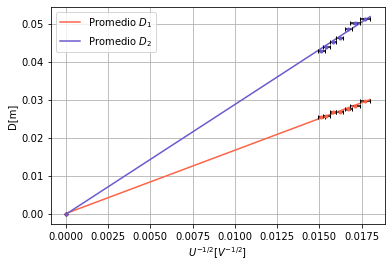

In [19]:
x = np.linspace(0,0.018,100)
y1 = param1[1] + param1[0]*x 
y2 = param2[1]+param2[0]*x
plt.plot(x,y1,c='Tomato',label=r'Promedio $D_1$')
plt.plot(x,y2,c='SlateBlue',label=r'Promedio $D_2$')
plt.grid()
plt.errorbar(U,D1,xerr=IncU,yerr=IncD1,fmt='o',color='Tomato',capsize=2,ecolor='k',markersize=3)
plt.errorbar(U,D2,xerr=IncU,yerr=IncD2,fmt='o',color='SlateBlue',capsize=2,ecolor='k',markersize=3)
plt.legend()
plt.ylabel('D[m]')
plt.xlabel(r'$U^{-1/2}[V^{-1/2}$]')

## Incertidumbre de los parámetros de la pendiente


$$y = mx+b$$


$$S = \sum_{i = 1}^k ((y)_i-b-mx_i)^2$$

$$\Delta b = \sqrt{\frac{S}{k-2}\frac{\sum x^2}{{\sum x^2 - \left(\sum x\right)^2}}}$$

$$\Delta m = \sqrt{\frac{S}{k-2}\frac{k}{\sum x^2 - \left(\sum x\right)^2}}$$

Esta vez estoy haciendo un arreglo medio ilegal: la resta del denominador la estoy invirtiendo para que no me de negativo :) 

In [8]:
S1 = 0
S2 = 0
SumCuad = 0
SumSing = 0
k = len(U)
for i in range(k):
    S1 += (D1[i]-param1[1]-param1[0]*U[i])**2
    S2 += (D2[i]-param2[1]-param2[0]*U[i])**2
    SumSing += U[i]
    SumCuad += (U[i])**2

Dm1 =(((S1/(k-2))*(k/abs(SumCuad - (SumSing)**2))))
Dm2 =(((S2/(k-2))*(k/abs(SumCuad - (SumSing)**2))))
Db1 =(((S1/(k-2))*(SumCuad/abs(SumCuad - (SumSing)**2))))
Db2 =(((S2/(k-2))*(SumCuad/abs(SumCuad - (SumSing)**2))))

In [9]:
print(param1,Dm1,Db1) #(m_1,b_1), (Δm_1,Δ𝑏_1)

[1.6669925e+00 3.0356872e-05] 4.179560878717664e-05 9.727092033039617e-09


In [10]:
print(param2,Dm2,Db2) #(m_2,b_2), (Δm_2,Δ𝑏_2)

[ 2.88976784e+00 -1.66691771e-04] 0.00022480979953372953 5.231998464548486e-08


$$\chi^2 = \sum_{i=1}^k\left\lvert{\frac{(O_i-E_i)^2}{E_i}}\right\rvert$$ 
O --> observado
E --> esperado

In [11]:
chi1 = 0
for i in range(len(U)):
    E1 = param1[0]*U[i]+param1[1]
    num1 = np.abs(D1[i]-E1)**2
    chi1 += num1/np.abs(E1)

In [12]:
chi1

4.313195530218268e-05

# Incertidumbre h

In [21]:
e = 1.602177e-19
m = 9.109383e-31
d = [1.98998e-10,1.14756e-10]
L = 0.135
A = 2*m*e
B = 1/(2*L)

In [40]:
Dh1 = []
Dh2 = []
for i in range(len(U)):
    if i == 0:
        continue
    else:
        x1 = np.sqrt(((A*d[0]**2*D1[i]**2*100**2)/(16*V[i]*L**2))+((A*V[i]*d[0]**2*IncD1[i]**2)/(4*L**2)))
        x2 = np.sqrt(((A*d[1]**2*D2[i]**2*100**2)/(16*V[i]*L**2))+((A*V[i]*d[1]**2*IncD2[i]**2)/(4*L**2)))
        Dh1.append(x1)
        Dh2.append(x2)

In [39]:
Dh1 #incertidumbres de h con d1

[1.048499198987166e-35,
 9.751820073449417e-36,
 9.158788440344317e-36,
 8.737093026710241e-36,
 8.443528284680368e-36,
 8.002267723403541e-36,
 7.690812340263894e-36]

In [41]:
Dh2 #incertidumbres de h con d2

[1.0432169678620586e-35,
 9.871152114958628e-36,
 9.298127649857102e-36,
 8.637759540216713e-36,
 8.20763506832063e-36,
 7.786015558628884e-36,
 7.44032442224148e-36]

In [33]:
arctan = []
otracosa = []
sin = []
for i in range(len(D1)):
    arctan.append(np.arctan(D1[i]*B))
    otracosa.append(0.5*D1[i]*B)
    sin.append(np.sin(0.5*np.arctan(D1[i]*B)))
print(otracosa,arctan,sin)

[0.0, 0.054962962962962957, 0.052648148148148145, 0.05083333333333333, 0.049777777777777775, 0.04931481481481481, 0.04783333333333333, 0.04699999999999999] [0.0, 0.10948633769154408, 0.10490971385814155, 0.1013185437510522, 0.0992285891504438, 0.0983116668609418, 0.09537640823939102, 0.09372459727395506] [0.0, 0.054715830421818865, 0.052430805210054096, 0.05063760631887537, 0.049593942169129636, 0.04913603998167367, 0.04767013103558248, 0.046845148332911736]
